# ¿Cuál es la mejor tarifa?

La empresa Megaline ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Se va a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Contamos con los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. El objetivo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

El propósito del proyecto es ayudar al departamento comercial de Megaline a entender qué plan de prepago genera más ingresos. Para lograr esto, vamos a analizar los datos de 500 clientes preparando los datos para su análisis, realizando un análisis exploratorio para comprender mejor sus características, calcular los ingresos por cliente, compararlos y realizar pruebas estadísticas para una vez que se obtengan resultados, facilitar la toma de decisiones. 

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import seaborn as sns
import numpy as np
import math as mt 
import matplotlib.pyplot as plt
from scipy import stats as st

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
df_plans = pd.read_csv('/Users/samanthaestudillo/Documents/Tripleten/Sprint 4 - Análisis estadístico de datos /megaline_plans.csv')
df_users = pd.read_csv('/Users/samanthaestudillo/Documents/Tripleten/Sprint 4 - Análisis estadístico de datos /megaline_users.csv')
df_calls = pd.read_csv('/Users/samanthaestudillo/Documents/Tripleten/Sprint 4 - Análisis estadístico de datos /megaline_calls.csv')
df_messages = pd.read_csv('/Users/samanthaestudillo/Documents/Tripleten/Sprint 4 - Análisis estadístico de datos /megaline_messages.csv')
df_internet = pd.read_csv('/Users/samanthaestudillo/Documents/Tripleten/Sprint 4 - Análisis estadístico de datos /megaline_internet.csv')

## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


La tabla contiene 2 entradas y 8 columnas. Las columnas incluyen información como la cantidad de mensajes incluidos, datos por mes incluidos, minutos incluidos, el pago mensual en dólares, el precio por gigabyte, por mensaje y por minuto para cada plan, no se observan datos ausentes en ninguna de las columnas y los tipos de datos parecen adecuados para la mayoría de las columnas. 

## Corregir datos

Cambiamos el nombre de la columna **usd_monthly_pay** para que concuerde con la descripción inicial del proyecto.

In [5]:
df_plans = df_plans.rename(columns={'usd_monthly_pay': 'usd_monthly_fee'})
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Enriquecer los datos

In [6]:
df_plans['mb_per_month_included'] = df_plans['mb_per_month_included'] / 1024
df_plans = df_plans.rename(columns={'mb_per_month_included': 'gb_per_month_included'})
df_plans.head()

,messages_included,gb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()
print()
duplicated_users= df_users.duplicated().sum()
if duplicated_users >= 0:
    print("Filas duplicadas: ")
    print(duplicated_users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

Filas duplicadas: 
0


In [8]:
# Imprime una muestra de datos para usuarios
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [9]:
df_users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


La tabla contiene 500 entradas y 8 columnas. Las columnas incluyen información general del usuario como su nombre, apellido, edad y lugar de residencia, proporciona información de suscripción como la fecha de inicio y si el usuario permanece activo, no se observan valores duplicados. Como problema podemos resaltar el tipo de datos en las columnas **reg_date** y **churn_date** que estan en formato object lo cual puede dificultar su manipulación, lo mejor seria cambiarlos a formato de fecha. Tambien podemos observar datos ausentes en la columna **churn_date**, lo cual indica que no todos los usuarios han cancelado su servicio, podríamos llenar los valores ausentes en la columna con un valor como "Activo", además de convertir los megabytes a gigabytes para continuar con la unidad que maneja el cliente.

### Corregir los datos

Cambiamos el nombre de la columna **plan** para que coincida con la descripción del proyecto, tambien se rellenan los valores ausentes con la palabra **Activo** para que podamos obtener un resultado congruente.

In [10]:
df_users = df_users.rename(columns={'plan': 'plan_name'})
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], errors='coerce')
df_users['churn_date'].fillna('Activo', inplace=True)
df_users.info()
df_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan_name   500 non-null    object        
 7   churn_date  500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


/var/folders/9c/fjnw6j3x6vq4_j776crp2ssc0000gn/T/ipykernel_1617/2871327493.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_users['churn_date'].fillna('Activo', inplace=True)
/var/folders/9c/fjnw6j3x6vq4_j776crp2ssc0000gn/T/ipykernel_1617/2871327493.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Activo' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df_users['churn_date'].fillna('Acti

,user_id,first_name,last_name,age,city,reg_date,plan_name,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,Activo
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Activo
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,Activo
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,Activo
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,Activo


## Llamadas

In [9]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()
print()
duplicated_calls= df_calls.duplicated().sum()
if duplicated_calls >= 0:
    print("Filas duplicadas: ")
    print(duplicated_calls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

Filas duplicadas: 
0


In [11]:
# Imprime una muestra de datos para las llamadas
df_calls.head(5)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [12]:
df_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


La tabla contiene 137,735 entradas y 4 columnas. Las columnas incluyen información relevante a las llamadas de los usuarios, fecha y duración de la llamada en minutos. No se observan valores duplicados ni valores ausentes.

### Corregir los datos

El tipo de datos es correcto para la mayoría de las columnas a excepción de la columna **call_date** la cual se cambiará a datetime para favorecer la manipulacion de datos. 

In [13]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

Agregamos la columna **month** (mes) y redondeamos los valores de la columna **duration** que especifica la duración de las llamadas en minutos.

In [14]:
df_calls['month'] = df_calls['call_date'].dt.month
df_calls['duration'] = np.ceil(df_calls['duration'])
df_calls.sample(10, random_state = 10)

,id,user_id,call_date,duration,month
51859,1187_52,1187,2018-12-12,20.0,12
123778,1436_785,1436,2018-09-11,4.0,9
59688,1215_73,1215,2018-09-26,0.0,9
124129,1438_177,1438,2018-11-11,0.0,11
53456,1192_229,1192,2018-11-04,0.0,11
55919,1201_17,1201,2018-07-29,0.0,7
85050,1313_30,1313,2018-06-14,0.0,6
32879,1123_237,1123,2018-11-03,0.0,11
16147,1064_5,1064,2018-07-17,13.0,7
124993,1440_509,1440,2018-08-03,5.0,8


## Mensajes

In [16]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()
print()
duplicated_messages= df_messages.duplicated().sum()
if duplicated_messages >= 0:
    print("Filas duplicadas: ")
    print(duplicated_messages)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB

Filas duplicadas: 
0


In [17]:
# Imprime una muestra de datos para los mensajes
df_messages.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


### Corregir los datos

Se modificará el tipo de datos en la columna **message_date** para evitar errores en el análisis de datos.

In [18]:
df_messages['messages_date'] = pd.to_datetime(df_messages['message_date'])
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             76051 non-null  object        
 1   user_id        76051 non-null  int64         
 2   message_date   76051 non-null  object        
 3   messages_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.3+ MB


### Enriquecer los datos

Agregamos la columna **month** (mes)

In [19]:
df_messages['month'] = df_messages['messages_date'].dt.month
df_messages.sample(10, random_state = 10)

,id,user_id,message_date,messages_date,month
20849,1131_188,1131,2018-05-15,2018-05-15,5
60552,1382_88,1382,2018-12-12,2018-12-12,12
60678,1382_317,1382,2018-11-09,2018-11-09,11
15362,1101_419,1101,2018-08-22,2018-08-22,8
2388,1028_300,1028,2018-05-27,2018-05-27,5
71804,1467_136,1467,2018-07-27,2018-07-27,7
2963,1032_18,1032,2018-11-21,2018-11-21,11
50118,1328_1076,1328,2018-11-24,2018-11-24,11
13690,1091_7,1091,2018-11-19,2018-11-19,11
54300,1343_393,1343,2018-11-02,2018-11-02,11


## Internet

In [20]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()
print()
duplicated_internet= df_internet.duplicated().sum()
if duplicated_internet >= 0:
    print("Filas duplicadas: ")
    print(duplicated_internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB

Filas duplicadas: 
0


In [21]:
# Imprime una muestra de datos para el tráfico de internet
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [22]:
df_internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


La tabla contiene 104,825 entradas y 4 columnas. Las columnas contienen información sobre el volumen de datos gastados durante la sesión y la fecha. Todas las columnas tienen el mismo número de entradas no nulas que la cantidad total de entradas por lo que no hay valores ausentes y tampoco se aprecian filas duplicadas.

### Corregir los datos

Para mejorar la manipulación de los datos cambieremos el tipo de datos de la columna **session_date** al formato de fecha.

In [23]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

Agregamos la columna **month** (mes), convertimos y redondeamos las cantidades dentro de la columna **mb_used** para manejarlo en gigabytes, así que modificamos tambien el nombre la columna para evitar confusiones. 

In [24]:
df_internet['month'] = df_internet['session_date'].dt.month
df_internet['mb_used'] = df_internet['mb_used'] / 1024
df_internet = df_internet.rename(columns={'mb_used': 'gb_used'})
df_internet.head()

,id,user_id,session_date,gb_used,month
0,1000_13,1000,2018-12-29,0.087754,12
1,1000_204,1000,2018-12-31,0.000000,12
2,1000_379,1000,2018-12-28,0.644922,12
3,1000_413,1000,2018-12-26,0.264639,12
4,1000_442,1000,2018-12-27,0.859590,12


## Estudiar las condiciones de las tarifas

In [25]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
df_plans.head()

,messages_included,gb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

Agregamos los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo.

In [26]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_month = df_calls.groupby(['user_id', 'month']).count()['id'].reset_index(name='calls_count')
df_calls_month = calls_month
df_calls_month.head(5)

,user_id,month,calls_count
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


In [27]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_month = df_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='total_minutes')
df_minutes_month = minutes_month
df_minutes_month.head(5)

,user_id,month,total_minutes
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0


In [28]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_month = df_messages.groupby(['user_id', 'month']).count()['id'].reset_index(name='messages_count')
df_messages_month = messages_month
df_messages_month.head(5)

,user_id,month,messages_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [29]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
gb_month = df_internet.groupby(['user_id', 'month'])['gb_used'].sum().reset_index(name='gb_used')
df_internet['gb_used'] = np.ceil(df_internet['gb_used'])
df_gb_month = gb_month
df_gb_month.head(10)

,user_id,month,gb_used
0,1000,12,1.856904
1,1001,8,6.756982
2,1001,9,13.002754
3,1001,10,21.807119
4,1001,11,18.070605
5,1001,12,18.915215
6,1002,10,6.398447
7,1002,11,18.891680
8,1002,12,14.058828
9,1003,12,26.410293


In [30]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
merged_data = pd.merge(df_calls_month, df_minutes_month, on=['user_id', 'month'], how='outer')
merged_data = pd.merge(merged_data, df_messages_month, on=['user_id', 'month'], how='outer')
merged_data = pd.merge(merged_data, df_gb_month, on=['user_id', 'month'], how='outer')
merged_data.head()

,user_id,month,calls_count,total_minutes,messages_count,gb_used
0,1000,12,16.0,124.0,11.0,1.856904
1,1001,8,27.0,182.0,30.0,6.756982
2,1001,9,49.0,315.0,44.0,13.002754
3,1001,10,65.0,393.0,53.0,21.807119
4,1001,11,64.0,426.0,36.0,18.070605


In [31]:
# Añade la información de la tarifa
merged_data = pd.merge(merged_data, df_users[['user_id', 'plan_name']], on='user_id', how='left')
merged_data = pd.merge(merged_data, df_users[['user_id', 'city']], on='user_id', how='left')
merged_data['calls_count'].fillna(0, inplace=True)
merged_data['total_minutes'].fillna(0, inplace=True)
merged_data['messages_count'].fillna(0, inplace=True)
merged_data['gb_used'].fillna(0, inplace=True)
merged_data.head()

,user_id,month,calls_count,total_minutes,messages_count,gb_used,plan_name,city
0,1000,12,16.0,124.0,11.0,1.856904,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,27.0,182.0,30.0,6.756982,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,49.0,315.0,44.0,13.002754,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,65.0,393.0,53.0,21.807119,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,64.0,426.0,36.0,18.070605,surf,"Seattle-Tacoma-Bellevue, WA MSA"


In [32]:
merged_data.isnull().sum()

user_id           0
month             0
calls_count       0
total_minutes     0
messages_count    0
gb_used           0
plan_name         0
city              0
dtype: int64

In [33]:
# Calcula el ingreso mensual para cada usuario
merged_data['calls_excess'] = merged_data['calls_count'] - df_plans['minutes_included'].values[0]
merged_data['messages_excess'] = merged_data['messages_count'] - df_plans['messages_included'].values[0]
merged_data['gb_excess'] = merged_data['gb_used'] - df_plans['gb_per_month_included'].values[0]

merged_data['calls_excess'] = merged_data['calls_excess'].clip(lower=0)
merged_data['messages_excess'] = merged_data['messages_excess'].clip(lower=0)
merged_data['gb_excess'] = merged_data['gb_excess'].clip(lower=0)

merged_data['calls_revenue'] = merged_data['calls_excess'] * df_plans['usd_per_minute'].values[0]
merged_data['messages_revenue'] = merged_data['messages_excess'] * df_plans['usd_per_message'].values[0]
merged_data['gb_revenue'] = merged_data['gb_excess'] * df_plans['usd_per_gb'].values[0]  

merged_data = pd.merge(merged_data, df_plans[['plan_name', 'usd_monthly_fee']], left_on='plan_name', right_on='plan_name', how='left')
merged_data['monthly_revenue'] = merged_data['calls_revenue'] + merged_data['messages_revenue'] + merged_data['gb_revenue'] + df_plans['usd_monthly_fee'].values[0]

merged_data.head(15)

,user_id,month,calls_count,total_minutes,messages_count,gb_used,plan_name,city,calls_excess,messages_excess,gb_excess,calls_revenue,messages_revenue,gb_revenue,usd_monthly_fee,monthly_revenue
0,1000,12,16.0,124.0,11.0,1.856904,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0,0.000000,0.0,0.00,0.000000,70,20.000000
1,1001,8,27.0,182.0,30.0,6.756982,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.000000,0.0,0.00,0.000000,20,20.000000
2,1001,9,49.0,315.0,44.0,13.002754,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.000000,0.0,0.00,0.000000,20,20.000000
3,1001,10,65.0,393.0,53.0,21.807119,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,3.0,6.807119,0.0,0.09,68.071191,20,88.161191
4,1001,11,64.0,426.0,36.0,18.070605,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,3.070605,0.0,0.00,30.706055,20,50.706055
5,1001,12,56.0,412.0,44.0,18.915215,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,3.915215,0.0,0.00,39.152148,20,59.152148
6,1002,10,11.0,59.0,15.0,6.398447,surf,"Las Vegas-Henderson-Paradise, NV MSA",0.0,0.0,0.000000,0.0,0.00,0.000000,20,20.000000
7,1002,11,55.0,386.0,32.0,18.891680,surf,"Las Vegas-Henderson-Paradise, NV MSA",0.0,0.0,3.891680,0.0,0.00,38.916797,20,58.916797
8,1002,12,47.0,384.0,41.0,14.058828,surf,"Las Vegas-Henderson-Paradise, NV MSA",0.0,0.0,0.000000,0.0,0.00,0.000000,20,20.000000
9,1003,12,149.0,1104.0,50.0,26.410293,surf,"Tulsa, OK MSA",0.0,0.0,11.410293,0.0,0.00,114.102930,20,134.102930


En esta sección, se han calculado métricas importantes para cada usuario, como el número de llamadas realizadas, minutos utilizados, SMS enviados y volumen de datos utilizados por mes, esto nos ayuda a comprender el comportamiento de los usuarios y determinar sus necesidades y patrones de uso. Se calcularon los ingresos mensuales por cada usuario restando el límite del total de llamadas, mensajes y datos utilizados, multiplicandolo por el valor de la tarifa de llamadas y agregar la cuota mensual en función del plan de llamadas. Estos ingresos mensuales nos ayudarán a entender la rentabilidad de cada usuario y plan.

## Estudia el comportamiento de usuario

### Llamadas

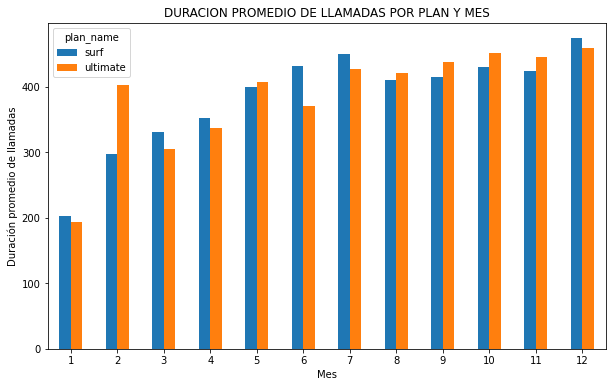

In [34]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
pivot_table_calls = merged_data.pivot_table(index='month', columns='plan_name', values='total_minutes', aggfunc='mean')
pivot_table_calls.plot(kind='bar', figsize=(10, 6), rot = 0)
plt.title('DURACION PROMEDIO DE LLAMADAS POR PLAN Y MES')
plt.xlabel('Mes')
plt.ylabel('Duración promedio de llamadas')
plt.show()

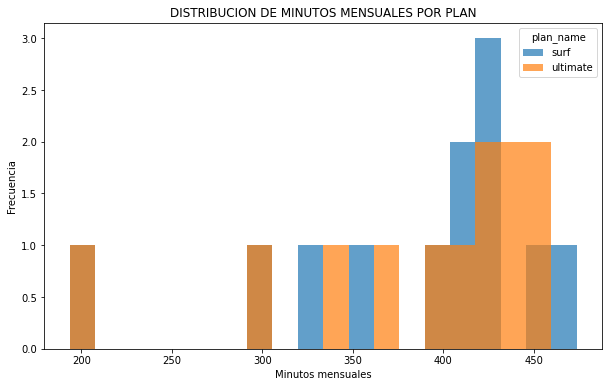

In [35]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
pivot_table_calls.plot(kind='hist', bins=20, alpha=0.7, figsize=(10, 6))
plt.title('DISTRIBUCION DE MINUTOS MENSUALES POR PLAN')
plt.xlabel('Minutos mensuales')
plt.ylabel('Frecuencia')
plt.show()

In [36]:
# Calcula la media y la varianza de la duración mensual de llamadas.
mean_by_plan_tminutes = merged_data.groupby('plan_name')['total_minutes'].mean()
variance_by_plan_tminutes = merged_data.groupby('plan_name')['total_minutes'].var()
median_by_plan_tminutes = merged_data.groupby('plan_name')['total_minutes'].median()
std_by_plan_tminutes = merged_data.groupby('plan_name')['total_minutes'].std()


print("Media", mean_by_plan_tminutes)
print()
print("Varianza", variance_by_plan_tminutes)
print()
print("Mediana", median_by_plan_tminutes)
print()
print("Desviación estandar", std_by_plan_tminutes)

Media plan_name
surf        428.749523
ultimate    430.450000
Name: total_minutes, dtype: float64

Varianza plan_name
surf        54968.279461
ultimate    57844.464812
Name: total_minutes, dtype: float64

Mediana plan_name
surf        425.0
ultimate    424.0
Name: total_minutes, dtype: float64

Desviación estandar plan_name
surf        234.453150
ultimate    240.508762
Name: total_minutes, dtype: float64


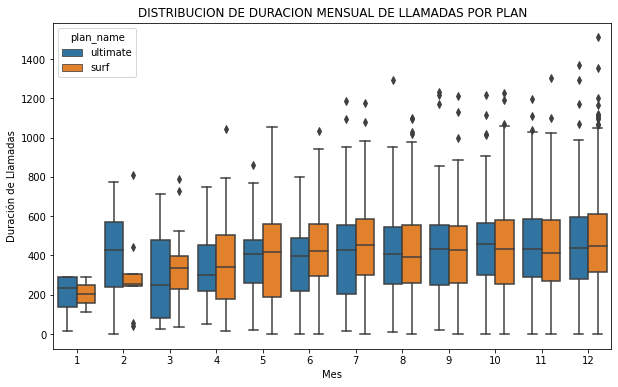

In [37]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='month', y='total_minutes', hue='plan_name')
plt.title('DISTRIBUCION DE DURACION MENSUAL DE LLAMADAS POR PLAN')
plt.xlabel('Mes')
plt.ylabel('Duración de Llamadas')
plt.show()

En general, la varianza en la duración de las llamadas es ligeramente mayor para el plan "Ultimate". Esto sugiere que, si bien los usuarios de ambos planes tienden a realizar llamadas de duración similar en promedio, los usuarios del plan "Ultimate" pueden mostrar una mayor variabilidad en la duración de sus llamadas en comparación con los usuarios del plan "Surf".

### Mensajes

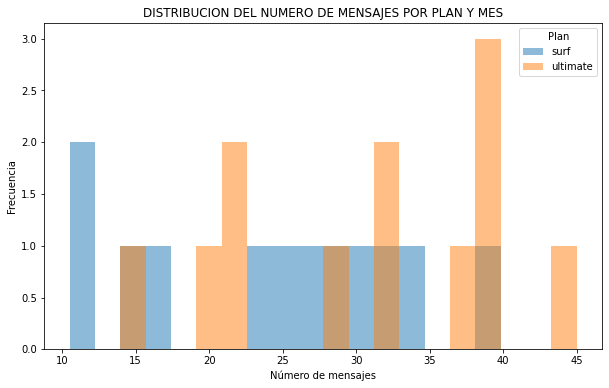

In [38]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
pivot_table_messages = merged_data.pivot_table(index='month', columns='plan_name', values='messages_count', aggfunc='mean')
pivot_table_messages.plot(kind='hist', alpha=0.5, bins=20, figsize=(10, 6))
plt.title('DISTRIBUCION DEL NUMERO DE MENSAJES POR PLAN Y MES')
plt.xlabel('Número de mensajes')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')
plt.show()

In [39]:
mean_by_plan_messages = merged_data.groupby('plan_name')['messages_count'].mean()
variance_by_plan_messages = merged_data.groupby('plan_name')['messages_count'].var()
median_by_plan_messages = merged_data.groupby('plan_name')['messages_count'].median()
std_by_plan_messages = merged_data.groupby('plan_name')['messages_count'].std()

print("Media", mean_by_plan_messages)
print()
print("Varianza", variance_by_plan_messages)
print()
print("Mediana", median_by_plan_messages)
print()
print("Desviación estandar", std_by_plan_messages)

Media plan_name
surf        31.159568
ultimate    37.551389
Name: messages_count, dtype: float64

Varianza plan_name
surf        1126.724522
ultimate    1208.756744
Name: messages_count, dtype: float64

Mediana plan_name
surf        24.0
ultimate    30.0
Name: messages_count, dtype: float64

Desviación estandar plan_name
surf        33.566717
ultimate    34.767179
Name: messages_count, dtype: float64


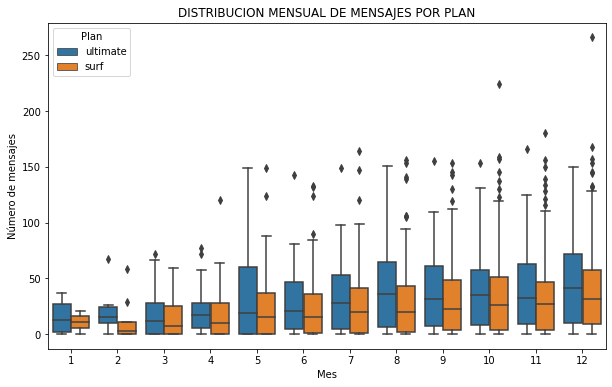

In [40]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='month', y='messages_count', hue = 'plan_name')
plt.title('DISTRIBUCION MENSUAL DE MENSAJES POR PLAN')
plt.xlabel('Mes')
plt.ylabel('Número de mensajes')
plt.legend(title='Plan')
plt.show()

En general, los usuarios de ambos planes tienden a enviar más mensajes a medida que avanza el año pero en conclusión; el comportamiento de los usuarios con respecto a los mensajes sí varía en función del plan ya que los usuarios del plan "Ultimate" tienden a enviar más mensajes en promedio que los usuarios del plan "Surf", la varianza es cercana a 1085, lo que indica una dispersión similar en la cantidad de mensajes enviados por usuario.

### Internet

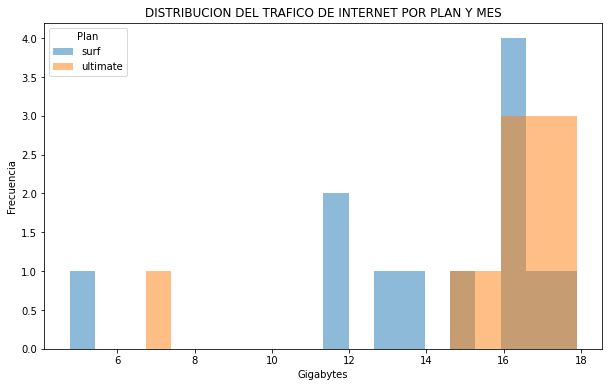

In [41]:
pivot_table_internet = merged_data.pivot_table(index='month', columns='plan_name', values='gb_used', aggfunc='mean')
pivot_table_internet.plot(kind='hist', alpha=0.5, bins=20, figsize=(10, 6))
plt.title('DISTRIBUCION DEL TRAFICO DE INTERNET POR PLAN Y MES')
plt.xlabel('Gigabytes')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')
plt.show()

In [42]:
mean_by_plan_internet = merged_data.groupby('plan_name')['gb_used'].mean()
variance_by_plan_internet = merged_data.groupby('plan_name')['gb_used'].var()
median_by_plan_messages_internet = merged_data.groupby('plan_name')['gb_used'].median()
std_by_plan_messages_internet = merged_data.groupby('plan_name')['gb_used'].std()

print("Media", mean_by_plan_internet)
print()
print("Varianza", variance_by_plan_internet)
print()
print("Mediana", median_by_plan_messages_internet)
print()
print("Desviación estandar", std_by_plan_messages_internet)

Media plan_name
surf        16.170199
ultimate    16.811230
Name: gb_used, dtype: float64

Varianza plan_name
surf        61.241527
ultimate    58.796209
Name: gb_used, dtype: float64

Mediana plan_name
surf        16.434873
ultimate    16.463223
Name: gb_used, dtype: float64

Desviación estandar plan_name
surf        7.825697
ultimate    7.667869
Name: gb_used, dtype: float64


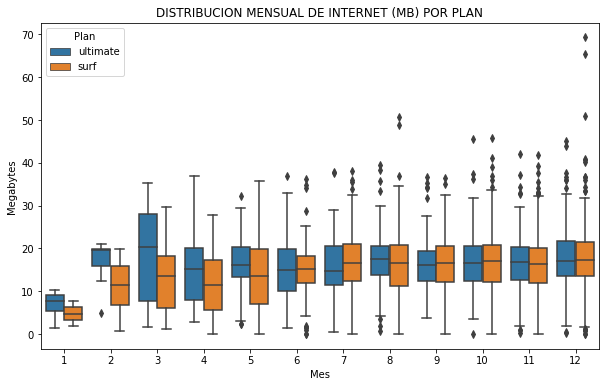

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='month', y='gb_used', hue = 'plan_name')
plt.title('DISTRIBUCION MENSUAL DE INTERNET (MB) POR PLAN')
plt.xlabel('Mes')
plt.ylabel('Megabytes')
plt.legend(title='Plan')
plt.show()

En general, aunque la media del uso mensual de tráfico de Internet es ligeramente mayor para el plan "Ultimate", no hay una diferencia significativa en la varianza entre los dos planes. Sin embargo, observamos variaciones en el uso mensual de Internet entre los meses para ambos planes, lo que sugiere que el comportamiento de los usuarios ademas de variar en función del plan tambien varia del mes.

## Ingreso

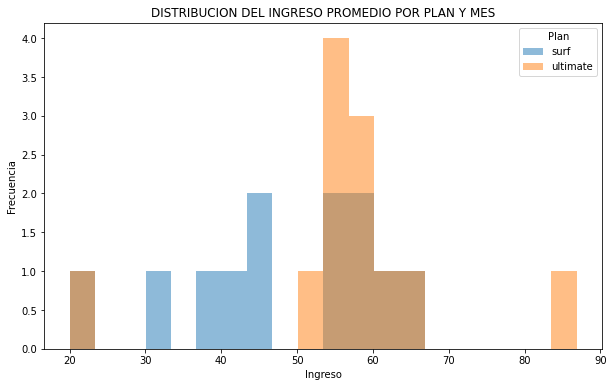

In [44]:
pivot_table_internet = merged_data.pivot_table(index='month', columns='plan_name', values='monthly_revenue', aggfunc='mean')
pivot_table_internet.plot(kind='hist', alpha=0.5, bins=20, figsize=(10, 6), rot = 0)
plt.title('DISTRIBUCION DEL INGRESO PROMEDIO POR PLAN Y MES')
plt.xlabel('Ingreso')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')
plt.show()

In [45]:
mean_by_plan_revenue= merged_data.groupby('plan_name')['monthly_revenue'].mean()
variance_by_plan_revenue= merged_data.groupby('plan_name')['monthly_revenue'].var()
median_by_plan_messages_revenue= merged_data.groupby('plan_name')['monthly_revenue'].median()
std_by_plan_messages_revenue= merged_data.groupby('plan_name')['monthly_revenue'].std()

print("Media", mean_by_plan_revenue)
print()
print("Varianza", variance_by_plan_revenue)
print()
print("Mediana", median_by_plan_messages_revenue)
print()
print("Desviación estandar", std_by_plan_messages_revenue)

Media plan_name
surf        55.829076
ultimate    58.595739
Name: monthly_revenue, dtype: float64

Varianza plan_name
surf        2810.968342
ultimate    3074.350875
Name: monthly_revenue, dtype: float64

Mediana plan_name
surf        34.379883
ultimate    34.632227
Name: monthly_revenue, dtype: float64

Desviación estandar plan_name
surf        53.018566
ultimate    55.446829
Name: monthly_revenue, dtype: float64


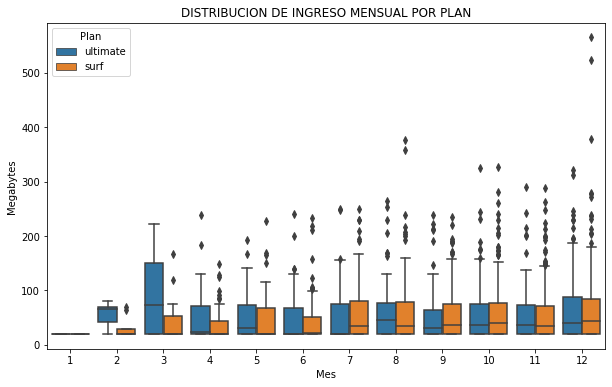

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='month', y='monthly_revenue', hue = 'plan_name')
plt.title('DISTRIBUCION DE INGRESO MENSUAL POR PLAN')
plt.xlabel('Mes')
plt.ylabel('Megabytes')
plt.legend(title='Plan')
plt.show()

En esta sección, se realizó un análisis del comportamiento de la clientela en función de las diferentes tarifas. Se calcularon los minutos, mensajes de texto y volumen de datos que los usuarios de cada tarifa consumen mensualmente. Además, se calcularon medidas estadísticas como la media, la varianza y la desviación estándar para comprender mejor la distribución de estos datos, se trazaron histogramas para visualizar la distribución de los datos ayudandonos a saber cómo están distribuidos los valores y cuál es su frecuencia relativa. En resumen, esta sección proporciona información valiosa sobre cómo se comportan los usuarios de diferentes planes y cómo varían sus patrones de consumo.

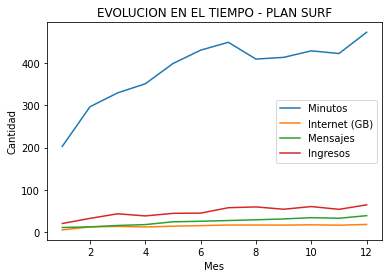

In [47]:
surf_data = merged_data[merged_data['plan_name'] == 'surf']
surf_data.groupby('month')[['total_minutes', 'gb_used', 'messages_count', 'monthly_revenue']].mean().plot()
plt.title('EVOLUCION EN EL TIEMPO - PLAN SURF')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.legend(['Minutos', 'Internet (GB)', 'Mensajes', 'Ingresos'])
plt.show()

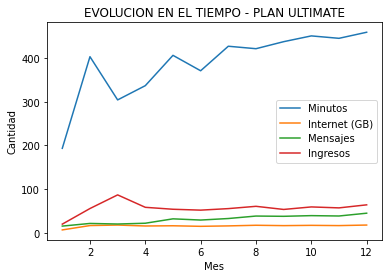

In [48]:
ultimate_data = merged_data[merged_data['plan_name'] == 'ultimate']
ultimate_data.groupby('month')[['total_minutes', 'gb_used', 'messages_count', 'monthly_revenue']].mean().plot()
plt.title('EVOLUCION EN EL TIEMPO - PLAN ULTIMATE')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.legend(['Minutos', 'Internet (GB)', 'Mensajes', 'Ingresos'])
plt.show()

A continuación, vamos a realizar la prueba de hipótesis utilizando la prueba t de Student para comparar las medias de los dos grupos, nos ayudara a determinar si hay una diferencia significativa en los ingresos promedio entre los usuarios de ambos planes, utilizando un valor alfa de 0.05 que es usualmente el valor que representa el nivel de confianza en los resultados de la prueba.

Hipótesis nula (H0): El ingreso promedio de los usuarios de las tarifas Ultimate y Surf es igual

Hipótesis alternativa (H1): El ingreso promedio de los usuarios de las tarifas Ultimate y Surf es diferente.

In [49]:
# Prueba las hipótesis
income_ultimate = merged_data[merged_data['plan_name'] == 'ultimate']['monthly_revenue']
income_surf = merged_data[merged_data['plan_name'] == 'surf']['monthly_revenue']

alpha = 0.05 

results = st.ttest_ind(income_ultimate, income_surf) 

print('valor p: ', results.pvalue) 

if results.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  0.25313920516948296
No podemos rechazar la hipótesis nula


Para probar que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones, utilizaremos un nivel de significancia del 5% y las siguientes hipótesis:

Hipótesis nula (H0): El ingreso promedio de los usuarios en el área de Nueva York-Nueva Jersey es igual al de los usuarios en otras regiones.

Hipótesis alternativa (H1): El ingreso promedio de los usuarios en el área de Nueva York-Nueva Jersey es diferente al de los usuarios en otras regiones.

In [50]:
# Prueba las hipótesis
income_nynj = merged_data[merged_data['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_revenue']
income_others = merged_data[merged_data['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_revenue']

alpha = 0.05 

results = st.ttest_ind(income_nynj, income_others) 

print('valor p: ', results.pvalue) 

if results.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  0.6260080719042829
No podemos rechazar la hipótesis nula


En esta sección se realizó un análisis de los datos para comprender el comportamiento de los usuarios y probar algunas hipótesis clave, a partir de la hipótesis nula y alternativa sobre el ingreso promedio de los usuarios de diferentes planes y en diferentes regiones, se utilizaron pruebas estadísticas apropiadas, como la prueba t de Student, para probar estas hipótesis, evaluando los valores p resultantes y comparamos con un valor alfa predefinido para tomar decisiones sobre las hipótesis nulas.

## Conclusión general
Para este proyecto se realizaron varios análisis para conocer el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos, a traves de varias etapas: 

Preparacion de los datos:
- Se cargaron y se convirtieron los datos en los tipos necesarios.
- Se identificaron y se corrigieron errores en los datos, como valores nulos o duplicados.
- Se calcularon las métricas mensuales para cada usuario, incluyendo el número de llamadas, mensajes y volumen de datos, así como los ingresos mensuales.

Análisis de los datos:
- Se describió el comportamiento de los clientes mediante el análisis de las métricas mensuales.
- Se calculó la media, la varianza y la desviación estándar para comprender la distribución y la dispersión de los datos.
- Se visualizaron las distribuciones de las métricas utilizando histogramas y gráficos de barras.

Pruebas de hipótesis:
- Se formularon hipótesis nula y alternativa sobre el ingreso promedio de los usuarios de diferentes planes y en diferentes regiones.
- Se utilizaron pruebas estadísticas, como la prueba t de Student y la prueba ANOVA, para probar estas hipótesis.
- Se evaluaron los valores p resultantes y se tomaron decisiones sobre las hipótesis nulas en función de un valor alfa predefinido.

Se concluye con que el plan Ultimate genera más ingresos en promedio que el plan Surf y se encontró evidencia de que los ingresos promedio de los usuarios en el área de Nueva York-Nueva Jersey eran diferentes a los de otras regiones, este proyecto proporcionó información valiosa sobre el comportamiento de los clientes de Megaline, permitiendo a la empresa tomar decisiones informadas para optimizar sus servicios y maximizar sus ingresos.
